In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from datetime import datetime
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import (
    Flask, render_template, jsonify,
    request, redirect)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Database Setup
engine = create_engine("sqlite:///video_games.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)

Videogames = Base.classes.videogames
session = Session(engine)

In [3]:
# Read into Pandas
stmt = session.query(Videogames).statement
df = pd.read_sql_query(stmt, session.bind)

In [4]:
df.head()

,ID,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76,51,8,324,E
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,,,,,
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82,73,8.3,712,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80,73,8,193,E
4,5,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,,,,,


In [5]:
df.dtypes

ID                   int64
Name                object
Platform            object
Year_of_Release     object
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score        object
Critic_Count        object
User_Score          object
User_Count          object
Rating              object
dtype: object

In [6]:
# Converting columns to numbers
df_nums = df.apply(pd.to_numeric, errors='ignore')
df_nums.head()

,ID,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,5,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,


In [7]:
df_nums.dtypes

ID                   int64
Name                object
Platform            object
Year_of_Release     object
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

In [8]:
df_nums2 = df_nums.dropna(axis=0, how="any")
df_nums2

,ID,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,8,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,91.0,64.0,8.6,465.0,E
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,E
14,15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.02,4.91,0.24,1.69,21.86,61.0,45.0,6.3,106.0,E
15,16,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,E


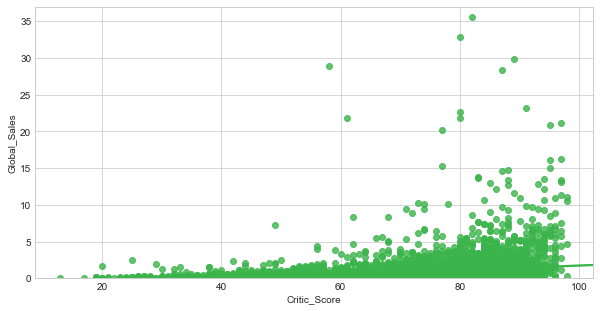

In [25]:
# Visualizing Global Sales vs Critic Score
sns.set_style("whitegrid")
fig = plt.subplots(figsize=(10,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df_nums2, color="#3bb44b").set(ylim=(0, 37))
plt.show()